In [1]:
# Useful starting lines
%matplotlib inline
import datetime
from costs import compute_loss
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload

%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
# standardize the data
tX_std = standardize(tX)


# least squares GD

In [3]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    return (-1/len(y))*tx.T@(y-tx@w)
    # ***************************************************


def least_squares_GD(y, tx, initial_w, max_iters, gamma):
    """least square gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # compute gradient computes the gradient
        gradient = compute_gradient(y,tx,w)
        # compute loss. here MSE is used
        loss = compute_loss(y,tx,w)
        # ***************************************************
        # TODO: update w by gradient
        w = w-gamma*gradient
        # ***************************************************
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}".format(
              bi=n_iter, ti=max_iters - 1, l=loss))

    return np.array(losses), np.array(ws)

# least square SGD

In [4]:

def compute_stoch_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    e = y-tx@w
    return -1/len(y)*tx.T@e
    # ***************************************************


def least_squares_SGD(y, tx, initial_w, batch_size, max_iters, gamma):
    """Least square stochastic gradient descent algorithm."""
    # ***************************************************
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute random batch
        a = batch_iter(y, tx, batch_size, num_batches=1, shuffle=True)
        a = list(a)
        tx2, y2 = a[0][1], a[0][0]
        
        # compute gradient & loss
        grad = compute_stoch_gradient(y2,tx2,w)
        loss= compute_loss(y2, tx2, w)
        print(grad)
        # update gradient
        w = w-gamma*grad
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("stoch Gradient Descent({bi}/{ti}): loss={l}".format(
              bi=n_iter, ti=max_iters - 1, l=loss))

    return np.array(losses), np.array(ws)

# least square
computed by solving for w:  X<sup>T</sup>X * w = X<sup>T</sup>y

In [5]:
def least_square(y, tx):
    w = np.linalg.solve(tx.T@tx,tx.T@y)
    return w, compute_loss(y, tx, w)


In [6]:
wls, loss = least_square(y, tX_std)

# Ridge regression

In [7]:
def ridge_regression(y, tx, lamda):
    w = np.linalg.solve(tx.T@tx+lamda*np.eye(tx.shape[1]),tx.T@y)
    return w, compute_loss(y, tx, w)


In [8]:
wls, loss = ridge_regression(y, tX_std,1)

# Logistic regression

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def update_weights(tx, y, w, gamma):
    #probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    gradient = np.dot(tx.T,  probabilities - y)
    w -= gradient*gamma / len(tx)
    return w

def loss_function(tx, y, w):
    #probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    #the error when label=1
    error1 = -y*np.log(probabilities)
    #the error when label=-1
    error2 = (1-y)*np.log(1-probabilities)
    #return average of sum of costs
    return (error1-error2).mean()


# logistic regression function
def logistic_regression(y,tx, initial_w,  max_iter, gamma):
    losses = []
    ws = []
    for iter_n in range(max_iter):
        w = update_weights(tx, y, initial_w, gamma)
        loss = loss_function(tx, y, w)
        losses.append(loss)
        ws.append(w)
    return np.array(losses), np.array(ws)

#################################################################################
def decision_boundary(prob):
    return 1 if prob >= .5 else 0

def classify(predictions):
    '''
    input  - N element array of predictions between 0 and 1
    output - N element array of 0s (False) and 1s (True)
    '''
    decision_boundary = np.vectorize(decision_boundary)
    return decision_boundary(predictions).flatten()

# reg logistic regression

In [16]:
def update_weights(tx, y, w, gamma, lambda_):
    #probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    gradient = np.dot(tx.T,  probabilities - y) + lambda_ * w
    w -= gradient*gamma / len(tx)
    return w

def loss_function(tx, y, w):
    #probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    #the error when label=1
    error1 = -y*np.log(probabilities)
    #the error when label=-1
    error2 = (1-y)*np.log(1-probabilities)
    #return average of sum of costs
    return (error1-error2).mean()


# regularized logistic regression function
def reg_logistic_regression(y,tx,lambda_, initial_w,  max_iter, gamma):
    losses = []
    ws = []
    for iter_n in range(max_iter):
        w = update_weights(tx, y, initial_w, gamma,lambda_)
        loss = loss_function(tx, y, w)
        losses.append(loss)
        ws.append(w)
    return np.array(losses), np.array(ws)


# tests on train set 

# test logistic regression

/Users/Maxime/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


Gradient Descent: execution time=2.519 seconds


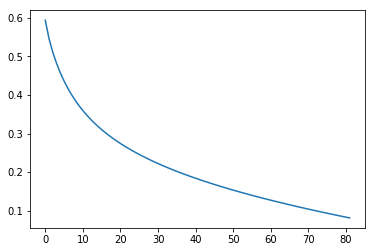

In [15]:
#Define the parameters of the algorithm.
max_iters = 100
gamma = 0.2
# Initialization
w_initial = np.zeros(30)

# Start gradient descent.
start_time = datetime.datetime.now()
losses, ws  = logistic_regression(y, tX_std, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
plt.plot(losses)

# test reg logistic regression

Gradient Descent: execution time=2.597 seconds
best loss: 0.1570169845486614


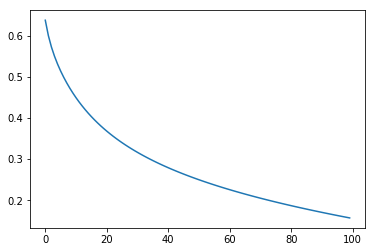

In [29]:
#Define the parameters of the algorithm.
max_iters = 100
gamma = 0.1
lambda_ = 0.2
# Initialization
w_initial = np.zeros(30)

# Start gradient descent.
start_time = datetime.datetime.now()
losses, ws  = reg_logistic_regression(y, tX_std,lambda_, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
plt.plot(losses)
print(f'best loss: {losses[-1]}')

# test GD

Gradient Descent(0/49): loss=1.0
Gradient Descent(1/49): loss=0.9264755130297591
Gradient Descent(2/49): loss=0.8962466370379258
Gradient Descent(3/49): loss=0.8771600577769223
Gradient Descent(4/49): loss=0.8642270151661157
Gradient Descent(5/49): loss=0.8551458442459039
Gradient Descent(6/49): loss=0.8485355498878918
Gradient Descent(7/49): loss=0.8435390789639572
Gradient Descent(8/49): loss=0.839618166428172
Gradient Descent(9/49): loss=0.836430789564036
Gradient Descent(10/49): loss=0.8337566792321113
Gradient Descent(11/49): loss=0.8314517631067185
Gradient Descent(12/49): loss=0.8294201370090645
Gradient Descent(13/49): loss=0.827596702095248
Gradient Descent(14/49): loss=0.8259363236853894
Gradient Descent(15/49): loss=0.8244070000529391
Gradient Descent(16/49): loss=0.8229855127345691
Gradient Descent(17/49): loss=0.8216546239049244
Gradient Descent(18/49): loss=0.8204012464387307
Gradient Descent(19/49): loss=0.8192152314360012
Gradient Descent(20/49): loss=0.8180885519776158

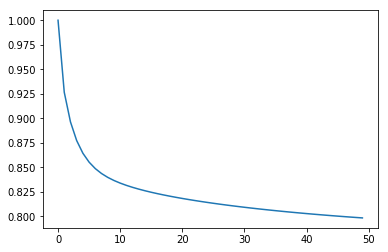

In [30]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
# Initialization
w_initial = np.zeros(30)

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = least_squares_GD(y, tX_std, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
plt.plot(gradient_losses)

# test SGD

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[ 0.35814674 -1.25200314 -0.22807492  0.17918371 -0.63936707 -0.60452962
 -0.63936262 -0.83419578  0.37136896 -0.04178886 -0.81398822  1.19162669
 -0.63936836  0.6157665   0.43817105 -1.10902353 -0.3290844   0.962472
  1.45075744 -1.12675648  1.68860334  0.43305254  0.02130497  0.76932273
  0.81769836  0.81763925 -0.63895617 -0.63936657 -0.63936694 -0.11604894]
stoch Gradient Descent(0/49): loss=1.0
[ 0.51377202  0.63163297  1.11118676 -0.81679292 -0.65735099 -0.62153364
 -0.65734642  0.61839262 -0.5350944  -0.37795515 -0.50826903 -1.10488769
 -0.65735231  0.85685952  0.61562949  1.09287473  0.55214898  1.33090427
 -0.96526951 -0.39591677  0.23834656 -0.81746938 -1.02997021 -1.25519763
 -1.26010247 -1.2601023  -0.65692853 -0.65735047 -0.65735086 -0.7664069 ]
stoch Gradient Descent(1/49): loss=1.0570465524461559
[ 0.30675172 -0.8779777  -0.55193073  0.03140885 -0.60813225 -0.5749967
 -0.60812802

[ 1.47167468 -2.1849315   5.80705667  1.99235525  2.66154872  2.44214054
  2.6556052   2.22422598 -1.11658495  3.2142682   1.55102981  2.19476038
  2.66014901  1.67761695  0.16526076 -1.90111687  6.75403515 -1.58444146
  0.98625357  0.89453707  0.99864808  2.67216092  1.77623576  1.52549154
  1.39245568  1.38194924  2.63918093  2.65466917  2.67067213  1.89035439]
stoch Gradient Descent(20/49): loss=2.89244950065641
[ 0.47906976  0.28174276  1.09350282 -0.81572388 -0.58674817 -0.55477779
 -0.58674409  1.13219732 -0.72528533 -0.53032219 -0.14623565 -0.97622194
 -0.58674935  0.04330457  0.0702769  -0.92177774  0.21389418 -1.24235765
  0.8100236  -0.61708729 -0.4080953  -0.62488358 -0.9193462  -1.12038306
 -1.12476109 -1.12476094 -0.58637109 -0.58674771 -0.58674805 -0.68409093]
stoch Gradient Descent(21/49): loss=0.8421761902550244
[ 0.58790687  0.57935431  1.144714    1.16518437 -0.67399263 -0.63726853
 -0.67398795  0.98412746  0.98317446  0.5500354   4.43054665  1.35684371
 -0.67399399 -

[ 0.58586082 -1.80687119  0.13098552  3.08831511  2.47629935  1.71869169
  2.48878888 -2.86684123 -1.28682591  3.36639806  1.29059503  0.90530191
  2.48262149  1.61580125 -0.98516042  1.11833932  6.04346962 -1.5575895
  1.791926   -1.81125155  2.18248779  3.09286412  1.6588614   1.52283956
  1.29388496  1.29092812  2.45352585  2.48156677  2.48329793  2.24403611]
stoch Gradient Descent(40/49): loss=2.5228113171803623
[ 0.5585475  -0.79476679 -1.51644263  2.35143377  2.22924309  1.56470052
  2.24612143 -1.86019008  0.83072302  0.90080633 -0.65572662  1.8070771
  2.23367665 -0.59130392  0.78743524  1.12104168 -1.01982724  0.65128877
  2.14245434  3.22429733  1.79646154  1.55043606  1.4925191   1.21681899
  1.17004281  1.16502281  2.25709714  2.24121918  2.22958568  1.42817543]
stoch Gradient Descent(41/49): loss=2.042228628718094
[ 0.34802282 -0.42124394 -1.22204352  0.96158641 -0.80982968 -0.76570417
 -0.80982405 -1.92375675  0.78291808 -0.14445661  0.57335934  0.76225401
 -0.80983131 -0

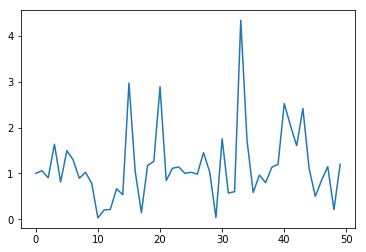

In [31]:
from proj1_helpers import batch_iter
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.01
batch_size = 1

# Initialization
w_initial = np.zeros(30)
print(w_initial)

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = least_squares_SGD(
    y, tX_std, w_initial,batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

plt.plot(sgd_losses)

## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [21]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [50]:
tX_test_std = standardize(tX_test)  # standardize par rapport a tX_train mean and std? 

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [71]:
predict_labels(gradient_ws[-1], tX_test_std)

array([-1., -1., -1., ...,  1.,  1., -1.])